## Introduction to trust-region management

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from estimagic.optimization.trust_region_management import (
    get_existing_points,
    get_next_trust_region_points_latin_hypercube,
)

np.random.seed(0)

In [2]:
def plot_sample(first_sample, second_sample=None):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    sns.regplot(
        x=first_sample[:, 0],
        y=first_sample[:, 1],
        ax=ax,
        fit_reg=False,
        color="darkblue",
        scatter_kws={"alpha": 0.4},
    )
    if second_sample is not None:
        sns.regplot(
            x=second_sample[:, 0],
            y=second_sample[:, 1],
            ax=ax,
            fit_reg=False,
            color="firebrick",
            scatter_kws={"alpha": 0.4},
        )
    return None

### Example Code

In [3]:
dim = 2
n_points = 30

first_center = np.ones(dim) * 0.4
first_radius = 0.3

first_sample, crit_vals = get_next_trust_region_points_latin_hypercube(
    center=first_center,
    radius=first_radius,
    n_points=n_points,
    n_iter=50_000,
    optimality_criterion="e-optimal",
)

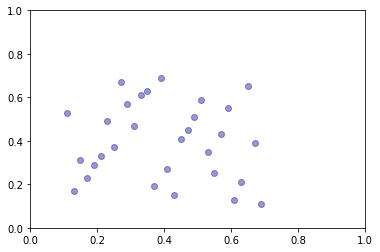

In [4]:
plot_sample(first_sample)

In [5]:
second_center = np.ones(dim) * 0.6
second_radius = 0.3

existing_points = get_existing_points(first_sample, second_center, second_radius)

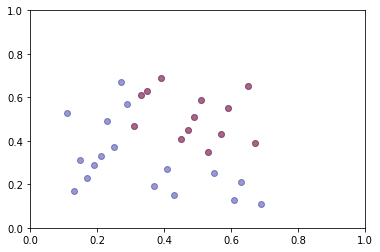

In [6]:
plot_sample(first_sample, existing_points)

In [7]:
second_sample, crit_vals = get_next_trust_region_points_latin_hypercube(
    center=second_center,
    radius=second_radius,
    n_points=n_points,
    existing_points=existing_points,
    optimality_criterion="e-optimal",
    n_iter=50_000,
)

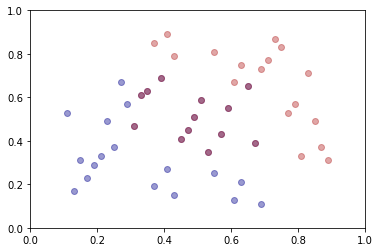

In [8]:
plot_sample(first_sample, second_sample)